# Internet Advertisements

Image data has been given from the internet. The aim is to predict if an image is an Advertisement (Ad) or not an Advertisement (non-Ad)

In [1]:
#importing all the packages required
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
# Reading the data from csv files
data_train = pd.read_csv("data/training.csv",header=None)
data_test = pd.read_csv("data/test.csv",header=None)
print("Shape of the Training Data :",data_train.shape)
print("Shape of the Testing Data :",data_test.shape)

Shape of the Training Data : (2623, 1559)
Shape of the Testing Data : (656, 1558)


In [3]:
#Taking a look at the data
data_train.head()

,0,1,2,3,4,5,6,7,8,9,...,1549,1550,1551,1552,1553,1554,1555,1556,1557,1558
0,?,?,?,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,nonad.
1,?,?,?,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,nonad.
2,15,60,4.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,nonad.
3,28,230,8.2142,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,nonad.
4,23,216,9.3913,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,nonad.


From above we can see that there are missing values in the dataset.

In [4]:
def preprocess_data(df):
    df.rename(columns={1558:"Target"},inplace=True) # Renaming the last column as 'Target'
    df.replace({'nonad.':0,'ad.':1},inplace=True) # Renaming nonad = 0, & ad = 1
    df.replace('[?]',np.nan,inplace=True,regex=True) # Replacing the missing values as np.NaN (Not a Number)
    
# The below function uses a heatmap to  plot the missing values
def plot_missing_data(df):
    df_missing = df[df.columns[:3]]
    sns.heatmap(df_missing.isnull(),cbar=False)
    plt.show()
    
# This function is used to plot the distribution of the target variable
def check_class_dist(df):
    sns.set(style="darkgrid")
    fig1 = sns.countplot(x="Target",data=df,palette=sns.color_palette("Set2"))
    plt.title("Class Distribution")
    plt.show()
    
# In this method, we handle the missing values, by replacing it with the provided strategy
# The strategy could be mean, median, most_frequent, or a constant value
def handling_missing_values(df,strategy):
    imp = SimpleImputer(missing_values=np.nan, strategy=strategy)
    data_handled = pd.DataFrame(imp.fit_transform(df),dtype=float)
    data_handled.rename(columns={1558:"Target"},inplace=True)
    return data_handled

# This method would input different types of classifiers and would plot all the metrics.
# The metrics include accuracy, classification_report, AUC-ROC Score, and also confusion matrix
def plot_clf_results(classifier):
    clf = classifier
    clf.fit(x_train,y_train)
    print("********Classifier Used********")
    print(clf,"\n")
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    print("Accuracy of the model :",accuracy)
    print("\n","Classification Report :")
    print(classification_report(y_test,y_pred))
    cm = confusion_matrix(y_test,y_pred)
    df_cm = pd.DataFrame(cm)
    plt.title("Confusion Matrix")
    sns.heatmap(df_cm,annot=True,fmt='d',cmap="YlGnBu",linewidths=0.5)
    plt.show()
    print("AUC-ROC Score :",roc_auc_score(y_test,y_pred))

In [5]:
preprocess_data(data_train)
#converting the dataset to type numeric,as it was string type earlier
data_train = data_train.apply(pd.to_numeric) 

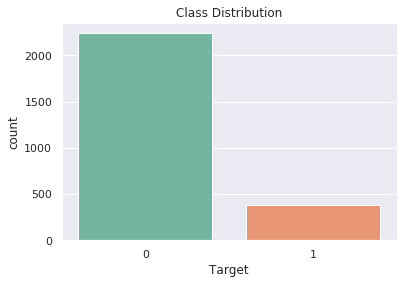

In [6]:
check_class_dist(data_train)

In [7]:
print(data_train.Target.value_counts())

0    2241
1     382
Name: Target, dtype: int64


## Plotting the column distribution

In [8]:
A = data_train[0]
Anan = A[~np.isnan(A)] # not including the null values from column 0
B = data_train[1]
Bnan = B[~np.isnan(B)] # not including the null values from column 1
C = data_train[2]
Cnan = C[~np.isnan(C)] # not including the null values from column 2
fig, axs = plt.subplots(ncols=3,figsize=(18,7),dpi=800)
sns.distplot(Anan,hist=True,bins=np.linspace(min(Anan),max(Anan),100),ax=axs[0],axlabel="Height")
sns.distplot(Bnan,hist=True,bins=np.linspace(min(Bnan),max(Bnan),100),ax=axs[1],axlabel="Width")
sns.distplot(Cnan,hist=True,bins=np.linspace(min(Cnan),max(Cnan),100),ax=axs[2],axlabel="AspectRatio")
plt.show()

Since the above data in the first three columns is right skewed, using mean as the central tendency could be deceiving, so we use "median" instead of "mean".

In [9]:
# replacing the missing values using median of the column.
data_median_train = handling_missing_values(data_train,'median') 

In [10]:
X = data_median_train[data_median_train.columns[:1558]] #features dataframe
Y = data_median_train['Target'] # target array ie., Ad and Non-Ad

In [11]:
# Splitting the given training data into train and test
# 80% - Training, 20% - Testing
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2, random_state=42)

## Implementing Naive Bayes

********Classifier Used********
GaussianNB(priors=None, var_smoothing=1e-09) 

Accuracy of the model : 0.7961904761904762

 Classification Report :
              precision    recall  f1-score   support

         0.0       0.98      0.77      0.86       442
         1.0       0.43      0.92      0.59        83

   micro avg       0.80      0.80      0.80       525
   macro avg       0.71      0.84      0.73       525
weighted avg       0.89      0.80      0.82       525



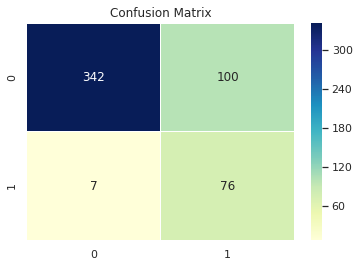

AUC-ROC Score : 0.8447091533555033


In [12]:
plot_clf_results(GaussianNB())

## Implementing LinearSVC

********Classifier Used********
SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False) 

Accuracy of the model : 0.9619047619047619

 Classification Report :
              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98       442
         1.0       0.85      0.93      0.89        83

   micro avg       0.96      0.96      0.96       525
   macro avg       0.92      0.95      0.93       525
weighted avg       0.96      0.96      0.96       525



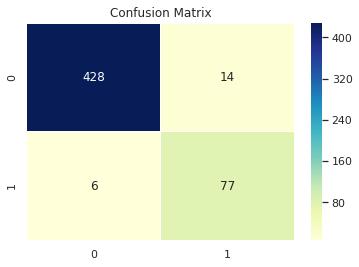

AUC-ROC Score : 0.9480183176143487


In [13]:
# Here by adding the class_weight and probability pararmeter
# we are adding a penalty to adjust due to class imbalance
plot_clf_results(svm.SVC(kernel='linear',class_weight="balanced",probability=True))

## Implementing K-Nearest Neighbours

********Classifier Used********
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=30, p=2,
           weights='uniform') 

Accuracy of the model : 0.92

 Classification Report :
              precision    recall  f1-score   support

         0.0       0.93      0.98      0.95       442
         1.0       0.86      0.59      0.70        83

   micro avg       0.92      0.92      0.92       525
   macro avg       0.89      0.79      0.83       525
weighted avg       0.92      0.92      0.91       525



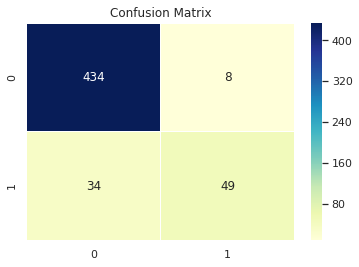

AUC-ROC Score : 0.7861309491359101


In [14]:
plot_clf_results(KNeighborsClassifier(n_neighbors=30))

## Implementing Logistic Regression

********Classifier Used********
LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False) 

Accuracy of the model : 0.9714285714285714

 Classification Report :
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98       442
         1.0       0.90      0.93      0.91        83

   micro avg       0.97      0.97      0.97       525
   macro avg       0.94      0.95      0.95       525
weighted avg       0.97      0.97      0.97       525



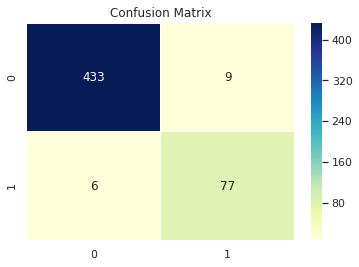

AUC-ROC Score : 0.9536744262116338


In [15]:
plot_clf_results(LogisticRegression(class_weight="balanced"))

## Implementing Decision Tree Classifier

********Classifier Used********
DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best') 

Accuracy of the model : 0.9542857142857143

 Classification Report :
              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97       442
         1.0       0.82      0.90      0.86        83

   micro avg       0.95      0.95      0.95       525
   macro avg       0.90      0.93      0.92       525
weighted avg       0.96      0.95      0.96       525



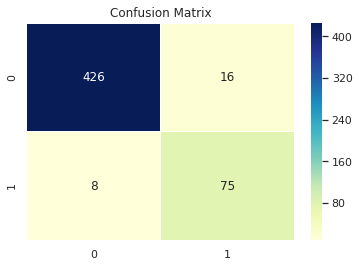

AUC-ROC Score : 0.9337076814043506


In [16]:
plot_clf_results(DecisionTreeClassifier(class_weight="balanced"))

## Implementing Random Forests Classifier

********Classifier Used********
RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False) 

Accuracy of the model : 0.9809523809523809

 Classification Report :
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       442
         1.0       0.99      0.89      0.94        83

   micro avg       0.98      0.98      0.98       525
   macro avg       0.98      0.94      0.96       525
weighted avg       0.98      0.98      0.98       525



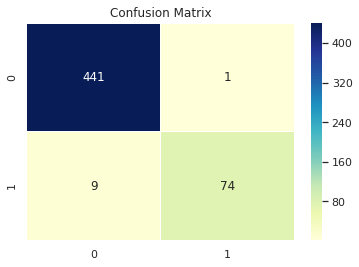

AUC-ROC Score : 0.9446519108106635


In [17]:
plot_clf_results(RandomForestClassifier(class_weight="balanced"))

From the above models, we can say that the Random Forest Classifier was the best model.
To be more confident with our results, let us also perform cross-validation, and rule out any possibility of having a bias in the train set.

In [18]:
# Cross Validation
x = np.array([[1, 2], [3, 4], [1, 2], [3, 4]]) # create an array
y = np.array([1, 2, 3, 4]) # Create another array
kf = KFold(n_splits=2) # Define the split - into 2 folds 
kf.get_n_splits(x) # returns the number of splitting iterations in the cross-validator
print(kf) 
KFold(n_splits=2, random_state=None, shuffle=False)

for train_index, test_index in kf.split(x):
    print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]

KFold(n_splits=2, random_state=None, shuffle=False)
TRAIN: [2 3] TEST: [0 1]
TRAIN: [0 1] TEST: [2 3]


Cross Validation Scores [0.96590909 0.97718631 0.98473282 0.97328244 0.96946565 0.96946565
 0.98091603 0.98091603 0.97709924 0.98854962]


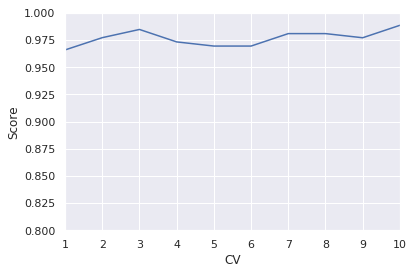

In [19]:
clf = RandomForestClassifier(class_weight="balanced")
model =  clf.fit(x_train,y_train)
scores = cross_val_score(model, X, Y, cv=10)
print("Cross Validation Scores",scores)
cv_scores = pd.DataFrame({"Score":scores,"CV":range(1,11)})

sns.lineplot(x="CV", y="Score", data=cv_scores)
plt.ylim([0.8,1])
plt.xlim([1,10])
plt.show()

The CV scores are  very consistent, so we can say that Random Forest Classifier works the best, and now we predict on our test file.

In [20]:
data_test.head() #taking a look at the test set.

,0,1,2,3,4,5,6,7,8,9,...,1548,1549,1550,1551,1552,1553,1554,1555,1556,1557
0,35,99,2.8285,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,?,?,?,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,28,105,3.75,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,150,108,0.72,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,52,144,2.7692,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


we can see that there are missing values here, so we will preprocess and handle the missing values in the same way as we did for the training data.

In [21]:
# preprocessing and handling missing values for test dataset
preprocess_data(data_test)
data_test = data_test.apply(pd.to_numeric) 
data_test_handled = handling_missing_values(data_test,"median")


In [22]:
x_pred = data_test_handled[data_test_handled.columns[:1557+1]]

In [23]:
clf_bst = RandomForestClassifier(class_weight="balanced")
# Fitting the model on whole training dataset
clf_bst.fit(X,Y)
data_test_handled["Target_Predicted"] = clf_bst.predict(x_pred)

In [24]:
data_test_handled.to_csv("test_predicted.csv",index=False)